# Exploratory Data Analysis (EDA)

Load the cleaned data...

In [1]:
import pandas as pd

In [2]:
data_path = "../clean_data/cleaned_data.csv"
data = pd.read_csv(data_path)

In [3]:
data

,img_idx,labels,age,gender,view_pos,img_w,img_h,img_pix_spc_x,img_pix_spc_y
0,00000001_000.png,Cardiomegaly,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,81,F,PA,2582,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...
112099,00030801_001.png,Mass|Pneumonia,39,M,PA,2048,2500,0.168,0.168
112100,00030802_000.png,No Finding,29,M,PA,2048,2500,0.168,0.168
112101,00030803_000.png,No Finding,42,F,PA,2048,2500,0.168,0.168
112102,00030804_000.png,No Finding,30,F,PA,2048,2500,0.168,0.168


Check data imbalanes and visualize the data.

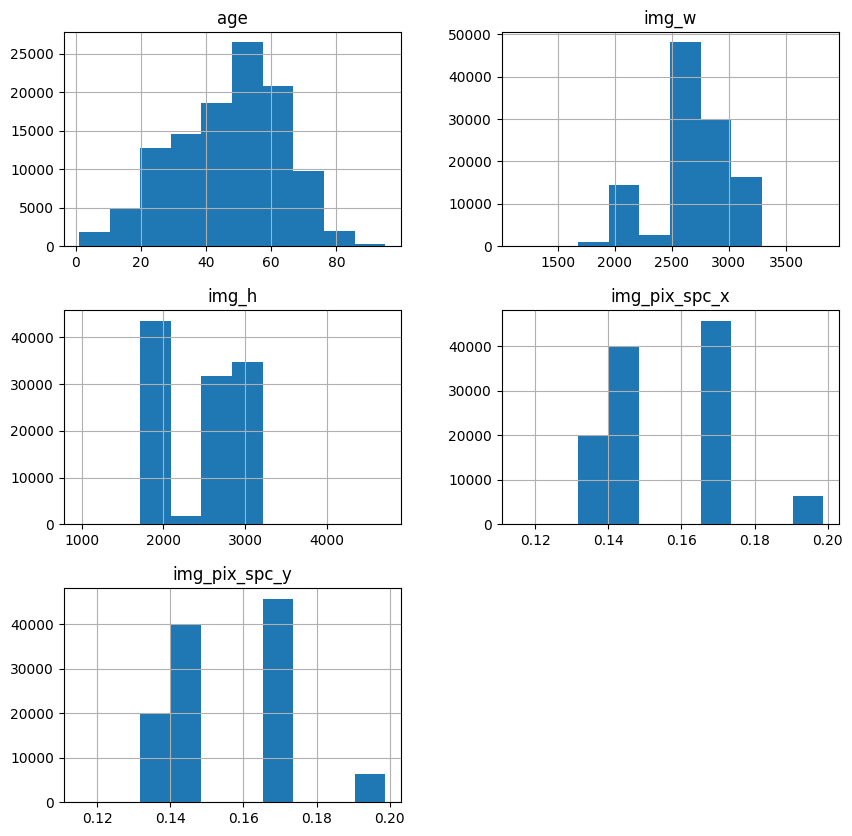

In [4]:
data.hist(figsize=(10,10));

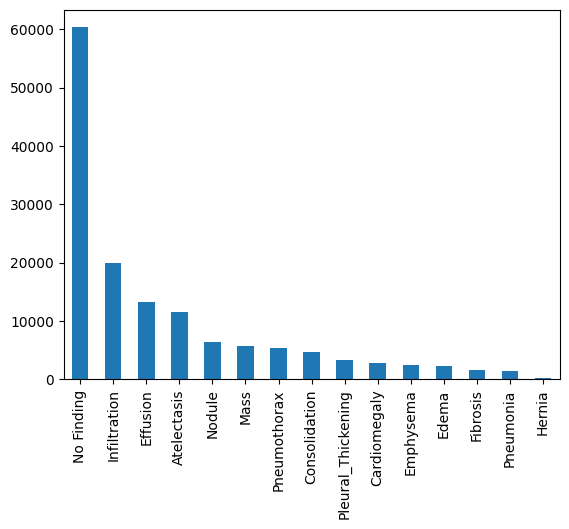

In [5]:
# Split labels based on a delimiter 
data["labels"].str.split("|").explode("labels").value_counts().plot(kind="bar");

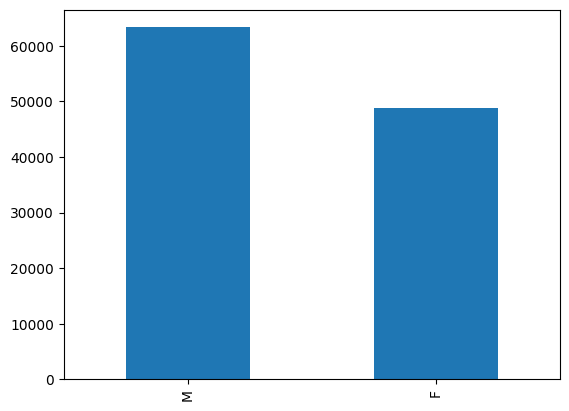

In [6]:
data["gender"].value_counts().plot(kind="bar");

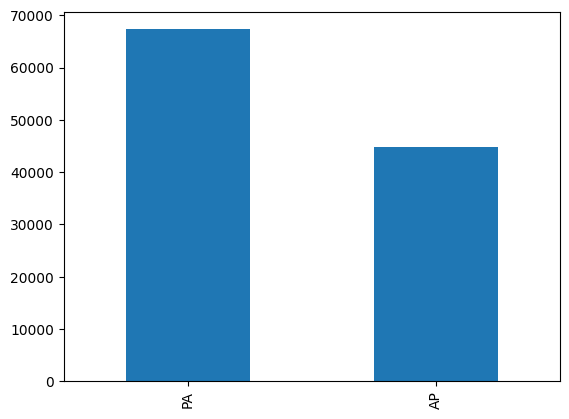

In [7]:
data["view_pos"].value_counts().plot(kind="bar");

In [8]:
df = pd.DataFrame(data["labels"].str.split("|").explode("labels").value_counts())
df

,labels
No Finding,60353
Infiltration,19891
Effusion,13316
Atelectasis,11558
Nodule,6331
Mass,5779
Pneumothorax,5301
Consolidation,4667
Pleural_Thickening,3384
Cardiomegaly,2776


In [9]:
df.sum(axis=0)

labels    141517
dtype: int64

In [10]:
df.filter(items=["Pneumonia", "Cardiomegaly", "Pleural_Thickening", "Consolidation", "Pneumothorax", "Effusion", "No Finding"], axis=0).sum()

labels    91227
dtype: int64

In [11]:
df.filter(items=["Pneumonia", "Cardiomegaly", "Pleural_Thickening", "Consolidation", "Pneumothorax", "Effusion", "No Finding"], axis=0)

,labels
Pneumonia,1430
Cardiomegaly,2776
Pleural_Thickening,3384
Consolidation,4667
Pneumothorax,5301
Effusion,13316
No Finding,60353


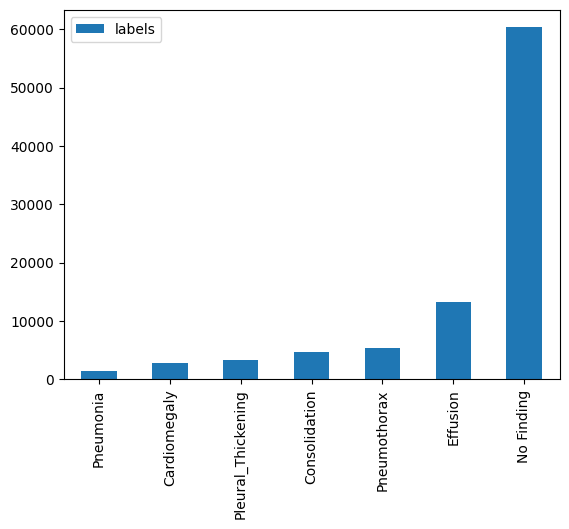

In [12]:
# Pneumonia Cardiomegaly pleural_thickening consolidation pneumothorax effusion
df.filter(items=["Pneumonia", "Cardiomegaly", "Pleural_Thickening", "Consolidation", "Pneumothorax", "Effusion", "No Finding"], axis=0).plot(kind="bar");

In [13]:

df = pd.DataFrame(data["labels"].str.split("|"))
df
# df["Cardiomegaly" in df]

,labels
0,[Cardiomegaly]
1,"[Cardiomegaly, Emphysema]"
2,"[Cardiomegaly, Effusion]"
3,[No Finding]
4,[Hernia]
...,...
112099,"[Mass, Pneumonia]"
112100,[No Finding]
112101,[No Finding]
112102,[No Finding]


In [14]:
df[["labels"]].stack().droplevel(1).value_counts()

[No Finding]                                                              60353
[Infiltration]                                                             9546
[Atelectasis]                                                              4214
[Effusion]                                                                 3955
[Nodule]                                                                   2705
                                                                          ...  
[Atelectasis, Consolidation, Edema, Effusion, Infiltration, Pneumonia]        1
[Atelectasis, Consolidation, Effusion, Emphysema, Mass, Pneumothorax]         1
[Cardiomegaly, Effusion, Pleural_Thickening, Pneumothorax]                    1
[Edema, Infiltration, Pneumothorax]                                           1
[Atelectasis, Consolidation, Mass, Pleural_Thickening, Pneumothorax]          1
Length: 836, dtype: int64

In [15]:
import os
import pathlib

import PIL
import PIL.Image

import tensorflow as tf

In [23]:
# cwd = os.getcwd()
# data_dir = pathlib.Path(cwd)
data_dir = pathlib.Path("../raw_data/temp_img")
data_dir

PosixPath('../raw_data/temp_img')

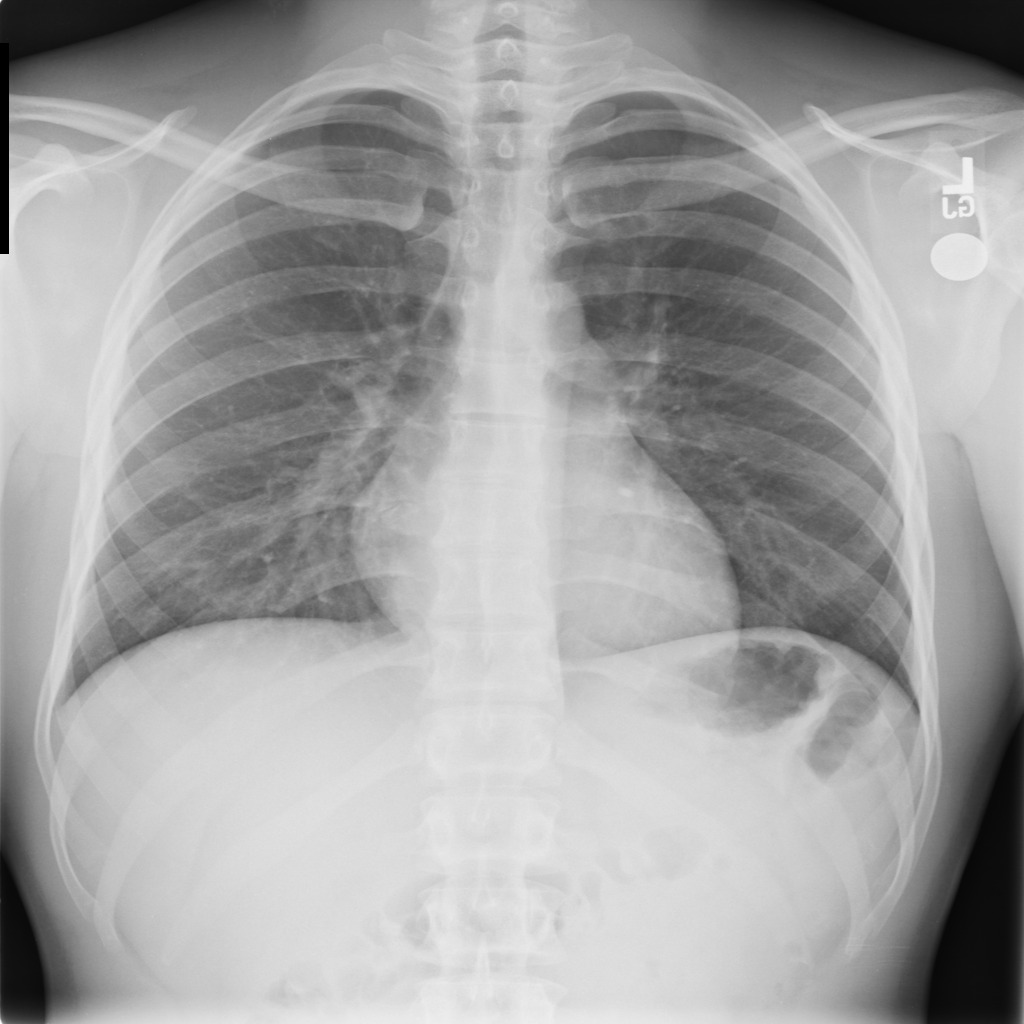

In [32]:
# xray = list(data_dir.glob('00030805_000.png'))
PIL.Image.open("../raw_data/temp_img/00030805_000.png")

# Baseline Model